# Breadth-first search in a labyrinth

A condition to apply BFS in an AI system is that the graph of states of the global datatabase
system has to be known, e.g. a labyrinth map is provided. If the graph is not known in advance,
BFS cannot be applied and the agent can apply depth-first search. BFS is an algorithm to plan
a path and to use the synthesised path multiple times.

Breadth-first search visits the neighbour vertices before visiting the child vertices, and a
queue is used. Depth-first search visits the child vertices before visiting the sibling vertices. A stack (often the program’s call stack via recursion) is generally used when implementing the algorithm.

See also : 
* https://en.wikipedia.org/wiki/Breadth-first_search,
* https://en.wikipedia.org/wiki/Graph_traversal.

# CSV Maze Reader

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import csv

# Read from a csv file and return an array
def mazeReader(fileName):
    mazeList = []
    with open(fileName) as mazeFile:
        mazeReader = csv.reader(mazeFile, delimiter=',')
        for row in mazeReader:
            mazeList.append(row)
    return mazeList

# Return the size of the Maze
def getMazeSize(mazeList):
    M = len(mazeList) - 1      # M => Number of Lines
    N = len(mazeList[0])       # N => Number of Columns
    return M, N

# Read and return the agent starting position
def getAgentInitialPosition(mazeList):
    M, N = getMazeSize(mazeList)
    X = int(mazeList[M][0]) 
    Y = int(mazeList[M][1]) 
    mazeList[Y][X] = 2
    return X, Y


# Maze printing

In [14]:
def printMaze(mazeList):
    plt.clf()
    # plt.axis("off")
    M, N = getMazeSize(mazeList)
    X, Y = getAgentInitialPosition(mazeList)

    fig = plt.figure(figsize=(N * 0.6, M * 0.6))

    # Mark the agent starting position
    plt.plot(X + 0.5, M - Y - 0.5, 'kx', markersize=(12))

    # Drawing the maze column by column
    for i in range(N):        # i => n° of the column
        for j in range(M):    # j => n° of the line

            ### Data Format ###
            # 1 = Wall
            # 0 = Not visited yet

            #### Printing of the walls ####
            # if the current tile is a wall
            if (mazeList[j][i] == '1'):
                # Then draw a square
                plt.plot([i + 1, i + 1, i, i, i + 1],
                         [M - j, M - j - 1, M - j - 1, M - j, M - j],
                         color="k")

            else:
                # if the current tile isn't an exit (= on the border)
                if (i != 0 and j != 0 and i != N-1 and j != M-1):
                    # Print the Agent's path
                    # if the current tile isn't an empty tile
                    # or the agent's starting position
                    if (mazeList[j][i] == -1):
                        plt.text(i + 0.5, M - j - 0.55, mazeList[j][i],
                                 horizontalalignment="center",
                                 verticalalignment="center",
                                 color="r",
                                 fontsize=(12))
                    else :
                        if(mazeList[j][i] != '0' and mazeList[j][i] != 2 and mazeList[j][i]):
                            #plt.plot(i + 0.5, M - j - 0.5, 'o', markersize=20, color='w', markeredgecolor='r')
                            plt.text(i + 0.5, M - j - 0.55, mazeList[j][i],
                                    horizontalalignment="center",
                                    verticalalignment="center",
                                    color="g",
                                    fontsize=(12))

                # if it is an exit.
                else:
                    if (mazeList[j][i] != '0'):
                        exitColor = "g"
                    else:
                        exitColor = "k"
                    if (i == 0):
                        exitMarker = '<'
                    elif (i == N - 1):
                        exitMarker = '>'
                    elif (j == 0):
                        exitMarker = '^'
                    elif (j == M - 1):
                        exitMarker = 'v'
                    plt.plot(i + 0.5, M - j - 0.5, exitMarker,
                             markersize=(10), color=exitColor)

    plt.xticks(np.arange(0, N+2, 1))
    plt.yticks(np.arange(0, M+2, 1))

    plt.axis('scaled')
    # plt.xlabel("X")
    # plt.ylabel("Y")

# Maze Solver - Breadth-First Search

In [15]:
# Production set
CXY = [[-1, 0, 1, 0],
       [0, 1, 0, -1]]

# Number of possible moves
K = len(CXY[0])


def mazeSolver(mazeList):
    global trials, CXY, K
    YES = False

    X, Y = getAgentInitialPosition(mazeList)    # Agent's starting position
    M, N = getMazeSize(mazeList)                # Maze's size
    MN = M * N

    # Make a copy of the lab
    mazeCopy = [row[:] for row in mazeList]

    # "Front?" to store opened nodes.
    FXY = [[0 for i in range(MN)], [0 for i in range(MN)]]
    # Counters
    closedNodes = 0
    newNodes = 0
    FXY[0][0] = X
    FXY[1][0] = Y

    # If an exit is reached
    if (X == 0 or Y == 0 or Y == M - 1 or X == N - 1):
        YES = True
        U = X
        V = Y
    else:
        # loop through the nodes
        while(True):
            # Coordinates of the node to be closed
            X = FXY[0][closedNodes]
            Y = FXY[1][closedNodes]

            # loop through the production rules
            for k in range(K):
                U = X + CXY[0][k]
                V = Y + CXY[1][k]
                # if the cell is free
                if (mazeCopy[V][U] == '0'):
                    # New wave's number
                    mazeCopy[V][U] = mazeCopy[Y][X] + 1
                    # If an exit is reached
                    if (U == 0 or V == 0 or U == N - 1 or V == M - 1):
                        YES = True
                        # here Back could be called
                    else:
                        trials += 1
                        newNodes += 1
                        FXY[0][newNodes] = U
                        FXY[1][newNodes] = V
                if (YES):
                    break
            # Next node will be closed
            closedNodes += 1
            if (closedNodes > newNodes or YES):
                break
        if(YES):
            return mazeCopy, U, V
    return

## Retrieve the path

In [16]:
def collectPath(X, Y, mazeList, mazeCopy):
    global K, CXY
    mazeList[Y][X] = mazeCopy[Y][X]
    M, N = getMazeSize(mazeList)
    idNode = mazeList[Y][X]
    restart = True

    while(restart):
        # loop through production rules
        for k in range(K):
            U = X + CXY[0][k]
            V = Y + CXY[1][k]
            # if inside the borders
            if (U > 0 and U < N and V > 0 and V < M):
                if(mazeCopy[V][U] == idNode - 1):
                    mazeList[V][U] = mazeCopy[V][U]
                    idNode -= 1
                    X = U
                    Y = V
            if (idNode == 2):
                restart = False
    return mazeList

# Simple Mazes


## After BFS

Number of trials : 124


<Figure size 432x288 with 0 Axes>

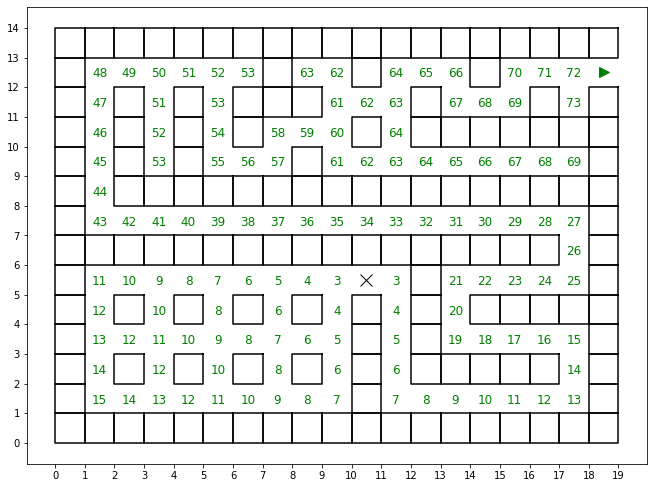

In [17]:
fileName = "Mazes/MazeC.csv"
mazeList = mazeReader(fileName)
mazeCopy = [row[:] for row in mazeList]
trials = 0

mazeCopy, exitX, exitY = mazeSolver(mazeList)
printMaze(mazeCopy)
print("Number of trials : %d" % trials)

## After path retrieving

In [18]:
print("Number of trials : %d" % trials)
mazeList = collectPath(exitX, exitY, mazeList, mazeCopy)
printMaze(mazeList)

Number of trials : 124


<Figure size 432x288 with 0 Axes>